In [2]:
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [4]:
df_1 = pd.read_csv('DPH_Abs_gr1.txt', delimiter='\t')
df_1 = df_1.iloc[1:]
df_1['Wavelength'] = pd.to_numeric(df_1['Wavelength'])
df_1['ABS'] = pd.to_numeric(df_1['ABS'])

KeyError: 'Wavelength'

In [1]:
df_2 = pd.read_csv('DPH_Em w etanolu slits 1_1.dat', delimiter='\t')
df_2 = df_2.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_2['Wavelength'] = pd.to_numeric(df_2['Wavelength'])
df_2['S1'] = pd.to_numeric(df_2['S1'])

NameError: name 'pd' is not defined

# Zadanie 2

In [4]:
df_2 = pd.read_csv('DPH_Em w etanolu slits 1_1.dat', delimiter='\t')
df_2 = df_2.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_2['Wavelength'] = pd.to_numeric(df_2['Wavelength'])
df_2['S1'] = pd.to_numeric(df_2['S1'])


In [5]:
df_3 = pd.read_csv('DPH_Em w wodzie slits 1_1.dat', delimiter='\t')
df_3 = df_3.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_3['Wavelength'] = pd.to_numeric(df_3['Wavelength'])
df_3['S1'] = pd.to_numeric(df_3['S1'])

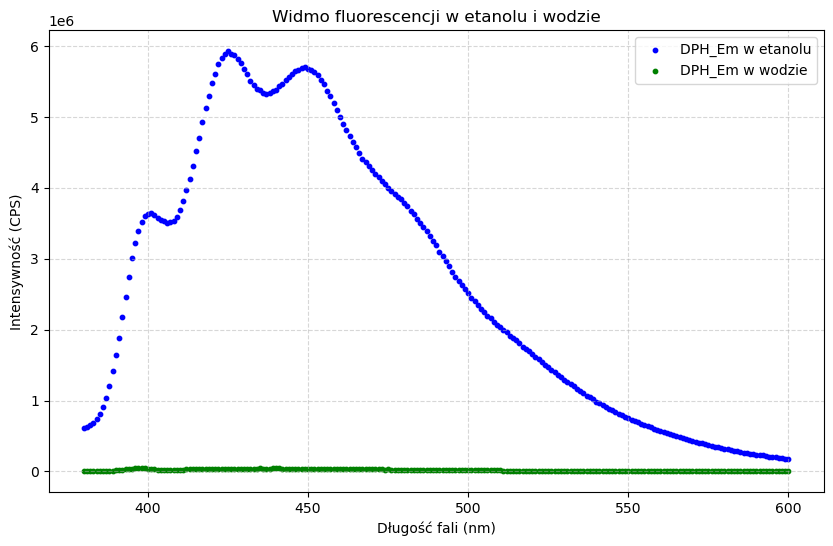

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2['Wavelength'], df_2['S1'], color='blue', s=10, label = 'DPH_Em w etanolu')
plt.scatter(df_3['Wavelength'], df_3['S1'], color='green', s=10, label = 'DPH_Em w wodzie')
plt.title('Widmo fluorescencji w etanolu i wodzie')
plt.xlabel('Długość fali (nm)')
plt.ylabel('Intensywność (CPS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Zadanie 3

In [10]:
df_4 = pd.read_csv('DPH_Anizo_DPPC.txt', delimiter='\t')
df_4 = df_4.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_4['Temperature'] = pd.to_numeric(df_4['Temperature'])
df_4['Anisotropy'] = pd.to_numeric(df_4['Anisotropy'])

In [13]:
df_5 = pd.read_csv('DPH_Anizo_EYPC.txt', delimiter='\t')
df_5 = df_5.iloc[1:]  # Pominięcie pierwszego wiersza z jednostkami
df_5['Temperature'] = pd.to_numeric(df_5['Temperature'])
df_5['Anisotropy'] = pd.to_numeric(df_5['Anisotropy'])

In [30]:

df_4_clean = pd.read_csv('DPH_Anizo_DPPC.txt', delimiter='\t')
df_4_clean['Temperature'] = pd.to_numeric(df_4_clean['Temperature'], errors='coerce')
df_4_clean['Anisotropy'] = pd.to_numeric(df_4_clean['Anisotropy'], errors='coerce')
df_4_clean.dropna()

,Temperature,Anisotropy,Unnamed: 2,Unnamed: 3,Unnamed: 4


In [31]:
df_5_clean = pd.read_csv('DPH_Anizo_EYPC.txt', delimiter='\t')
df_5_clean['Temperature'] = pd.to_numeric(df_5_clean['Temperature'], errors='coerce')
df_5_clean['Anisotropy'] = pd.to_numeric(df_5_clean['Anisotropy'], errors='coerce')
df_5_clean.dropna()

,Temperature,Anisotropy,Unnamed: 2


In [33]:
def sigmoid(T, A1, A2, Tm, k):
    return A1 + (A2 - A1) / (1 + np.exp((Tm - T) / k))

In [48]:
popt_4, _ = curve_fit(sigmoid, df_4_clean['Temperature'], df_4_clean['Anisotropy'], 
                        p0=[min(df_4_clean['Anisotropy']), max(df_4_clean['Anisotropy']), 25, 1])
A1_4, A2_4, Tm_4, k_4 = popt_4
print(f"Temperatura przejścia fazowego: {Tm_4:.2f}°C")

Temperatura przejścia fazowego: 41.38°C


In [49]:
popt_5, _ = curve_fit(sigmoid, df_5_clean['Temperature'], df_5_clean['Anisotropy'], 
                        p0=[min(df_5_clean['Anisotropy']), max(df_5_clean['Anisotropy']), 25, 1])
A1_5, A2_5, Tm_5, k_5 = popt_5
print(f"Temperatura przejścia fazowego: {Tm_5:.2f}°C")

Temperatura przejścia fazowego: 45.87°C


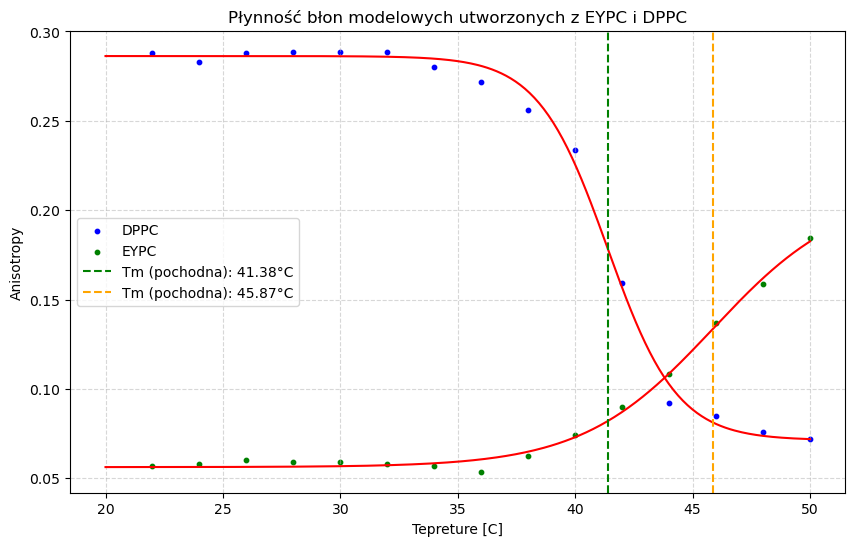

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df_4['Temperature'], df_4['Anisotropy'], color='blue', s=10, label = 'DPPC')
plt.scatter(df_5['Temperature'], df_5['Anisotropy'], color='green', s=10, label = 'EYPC')

T_range_4 = np.linspace(df_4_clean['Temperature'].min(), df_4_clean['Temperature'].max(), 300)
plt.plot(T_range_4, sigmoid(T_range_4, *popt_4), color='red')
T_range_5 = np.linspace(df_5_clean['Temperature'].min(), df_5_clean['Temperature'].max(), 300)
plt.plot(T_range_5, sigmoid(T_range_5, *popt_5), color='red')

plt.axvline(Tm_4, color='green', linestyle='--', label=f'Tm (pochodna): {Tm_4:.2f}°C')
plt.axvline(Tm_5, color='orange', linestyle='--', label=f'Tm (pochodna): {Tm_5:.2f}°C')

plt.title('Płynność błon modelowych utworzonych z EYPC i DPPC')
plt.xlabel('Tepreture [C]')
plt.ylabel('Anisotropy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()